# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [ ]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [ ]:
df = pd.read_csv('housing.csv')
df['ocean_proximity_code'] = pd.factorize(df['ocean_proximity'])[0]
df.drop('ocean_proximity', axis=1, inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_code
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

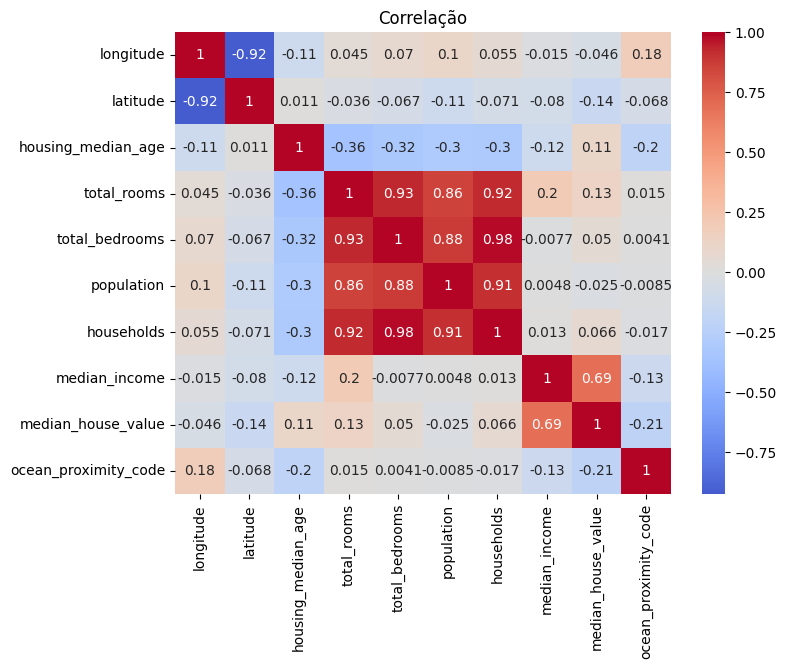

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlação')
plt.show()

### 3. Separe os dados em validação e teste

In [ ]:
# Separar os dados em treino e teste (80% para treino e 20% para teste)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=27)

# Separar os dados de treino em treino e validação (75% do total original para treino e 25% para validação)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=27)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [ ]:
X = df[['population','total_bedrooms']]
y = df['median_income']

# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# 8
tree_reg_8 = DecisionTreeRegressor(max_depth=8, random_state=27)
tree_reg_8.fit(X_train, y_train)

# 2
tree_reg_2 = DecisionTreeRegressor(max_depth=2, random_state=27)
tree_reg_2.fit(X_train, y_train)

# Previsões
y_pred_8 = tree_reg_8.predict(X_test)
y_pred_2 = tree_reg_2.predict(X_test)

# MSE
mse_8 = mean_squared_error(y_test, y_pred_8)
mse_2 = mean_squared_error(y_test, y_pred_2)

print(f'MSE da árvore com profundidade máxima de 8: {mse_8:.2f}')
print(f'MSE da árvore com profundidade máxima de 2: {mse_2:.2f}')

MSE da árvore com profundidade máxima de 8: 3.54
MSE da árvore com profundidade máxima de 2: 3.54


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [ ]:
y_train_pred_8 = tree_reg_8.predict(X_train)
y_train_pred_2 = tree_reg_2.predict(X_train)

# Fazer previsões na base de teste
y_test_pred_8 = tree_reg_8.predict(X_test)
y_test_pred_2 = tree_reg_2.predict(X_test)

# Calcular o MSE para a base de treinamento
mse_train_8 = mean_squared_error(y_train, y_train_pred_8)
mse_train_2 = mean_squared_error(y_train, y_train_pred_2)

# Calcular o MSE para a base de teste
mse_test_8 = mean_squared_error(y_test, y_test_pred_8)
mse_test_2 = mean_squared_error(y_test, y_test_pred_2)

print(f'MSE da árvore com profundidade máxima de 8 na base de treinamento: {mse_train_8:.2f}')
print(f'MSE da árvore com profundidade máxima de 2 na base de treinamento: {mse_train_2:.2f}')

print(f'\nMSE da árvore com profundidade máxima de 8 na base de teste: {mse_test_8:.2f}')
print(f'MSE da árvore com profundidade máxima de 2 na base de teste: {mse_test_2:.2f}')

MSE da árvore com profundidade máxima de 8 na base de treinamento: 3.55
MSE da árvore com profundidade máxima de 2 na base de treinamento: 3.58

MSE da árvore com profundidade máxima de 8 na base de teste: 3.54
MSE da árvore com profundidade máxima de 2 na base de teste: 3.54


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Com base nos resultados, mesmo a base com profundidade 8 tendo um desempenho melhor na base de treinamento ambas possuiram um MSE igual quando expostas a uma maior quantidade de dados, então, utilizarei a arvore com 2 de profundidade por ser mais facil de analizar.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

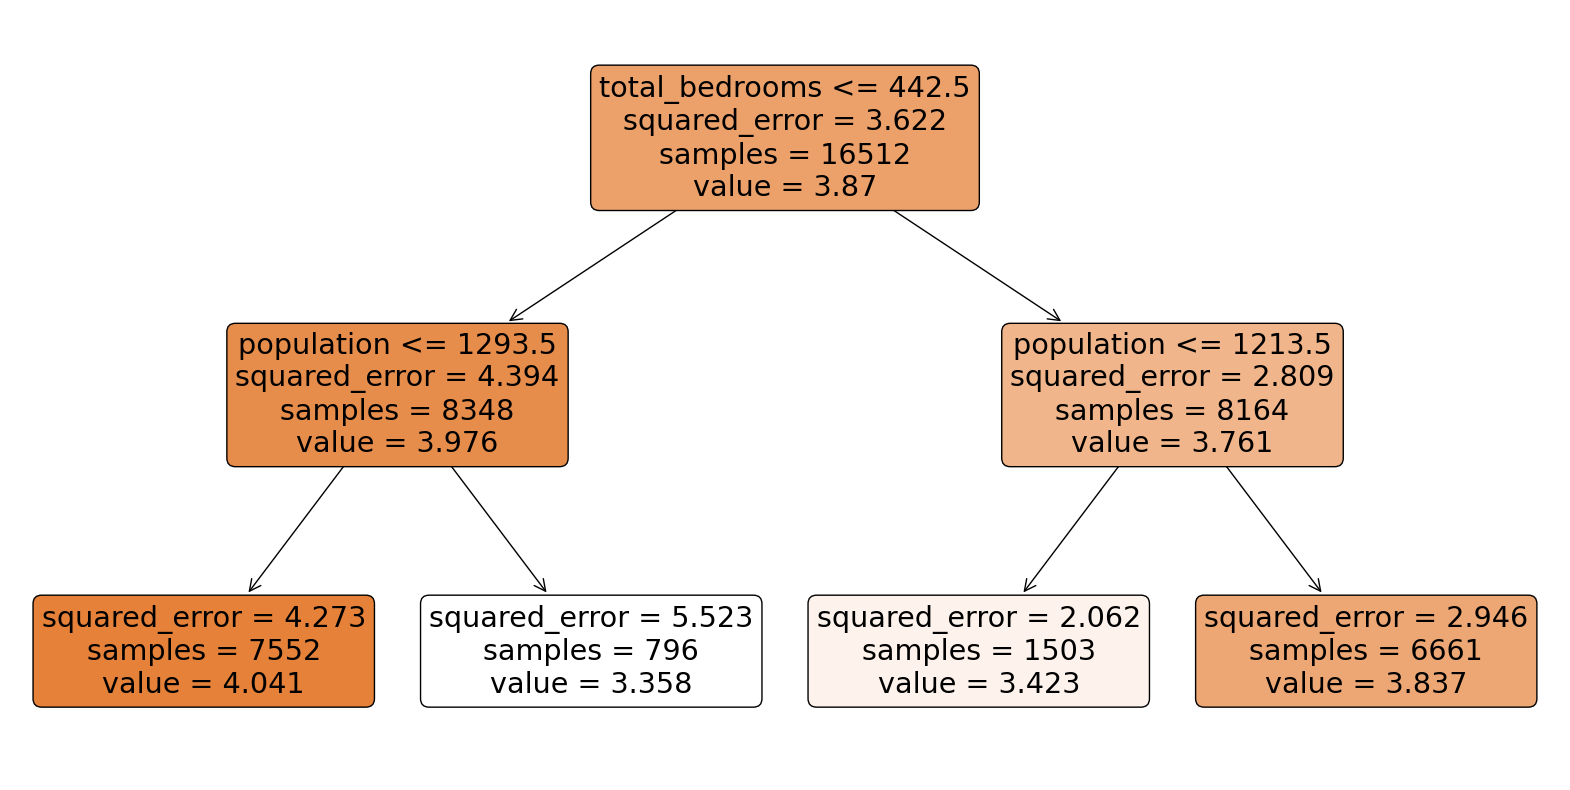

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Árvore de Decisão com Profundidade Máxima de 2")
plot_tree(tree_reg_2, feature_names=X.columns, filled=True, rounded=True)
plt.show()

No começo, eu havia tentando com 'households' no lugar de 'total_bedrooms', mas ele dividia de maneira que para um lado iria apenas 1 Sample logo na primeira regressão, então realizei a troca.

Achei importante a população por ser confiavel na matriz de correlação e possui divisões que deixam o MSE menor, não possuindo um 'squared_error' muito alto em nenhuma de suas etapas.